In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt
import pickle
%matplotlib inline

from stage1_util import calibrate, cal_undistort, load_camera_cal, corners_unwarp, pipeline

## Image Caliberation, Undistortion, and Prespective transformation

In [2]:
mtx, dist = load_camera_cal() #calibrate('camera_cal/calibration*.jpg')

True

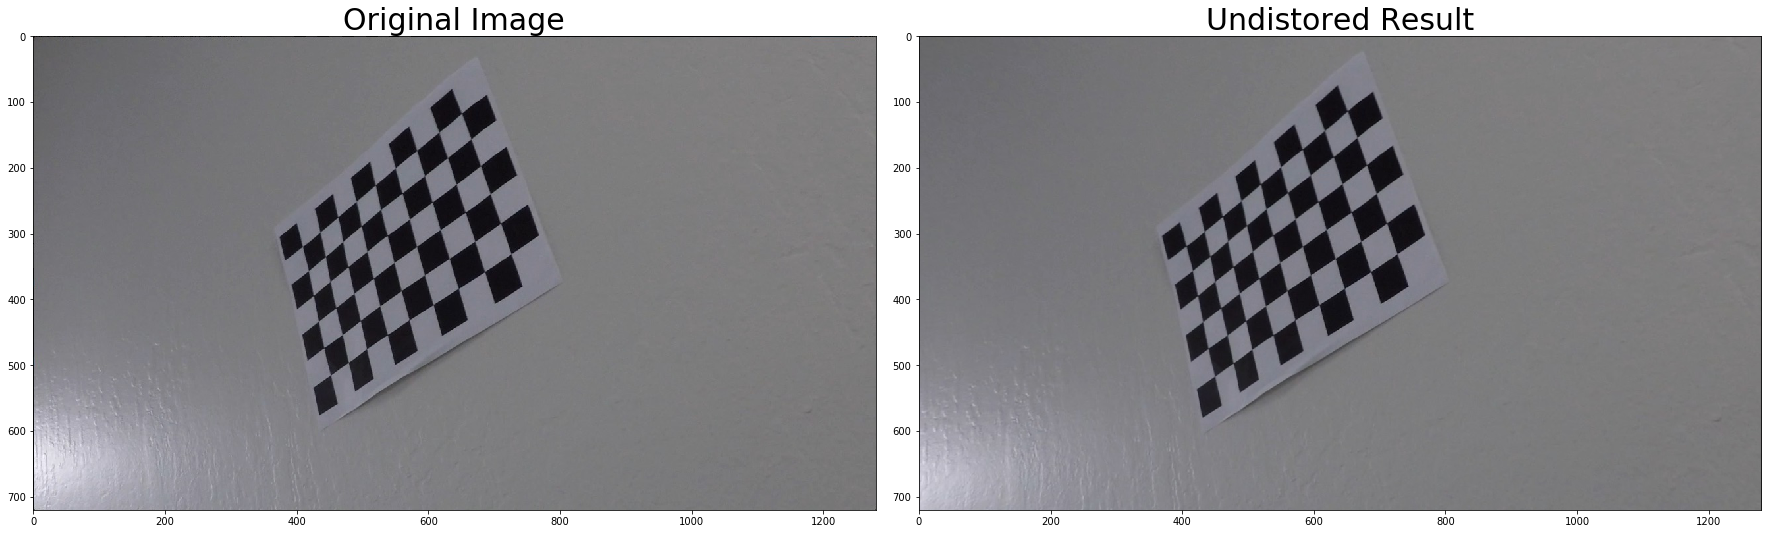

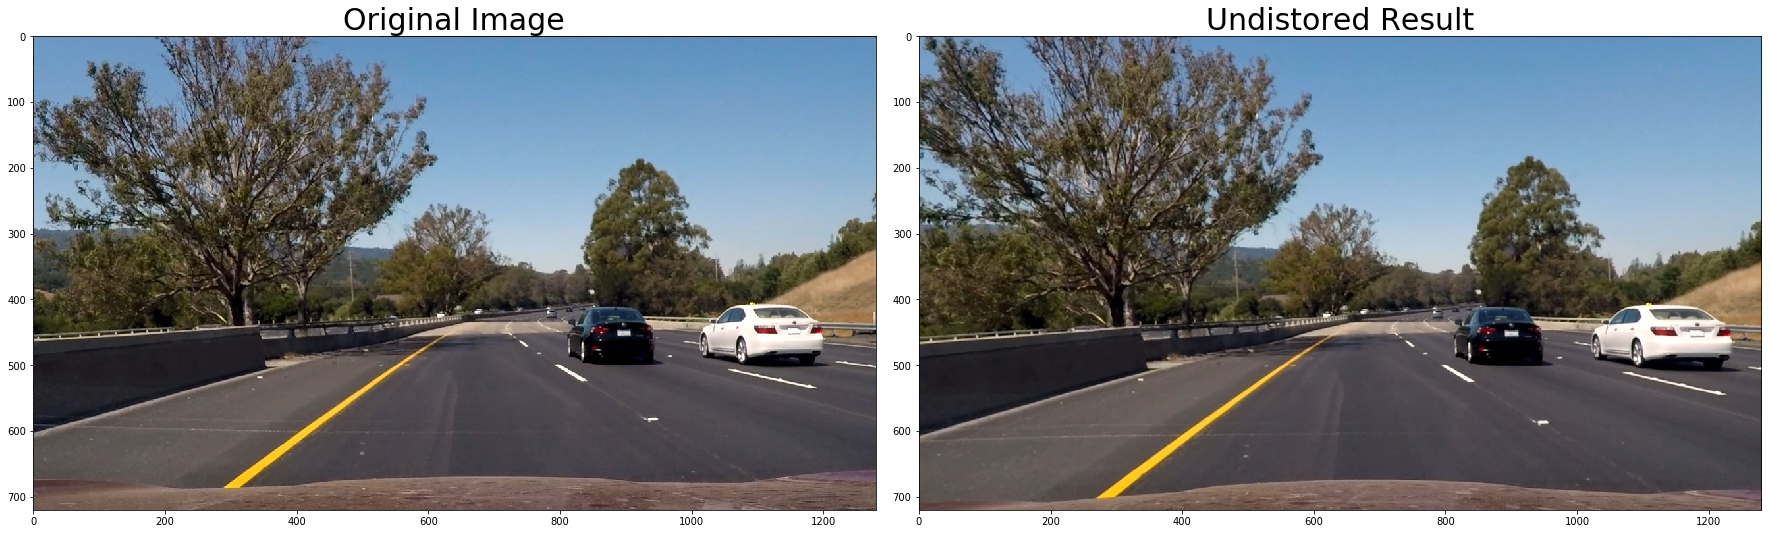

In [3]:
imag_cal_ex = plt.imread('camera_cal/calibration13.jpg')
und_img_cal_ex = cal_undistort(imag_cal_ex, mtx, dist)

img_test_ex = plt.imread('test_images/test6.jpg')
und_img_test_ex = cal_undistort(img_test_ex, mtx, dist)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(imag_cal_ex)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(und_img_cal_ex)
ax2.set_title('Undistored Result', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img_test_ex)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(und_img_test_ex)
ax2.set_title('Undistored Result', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

True

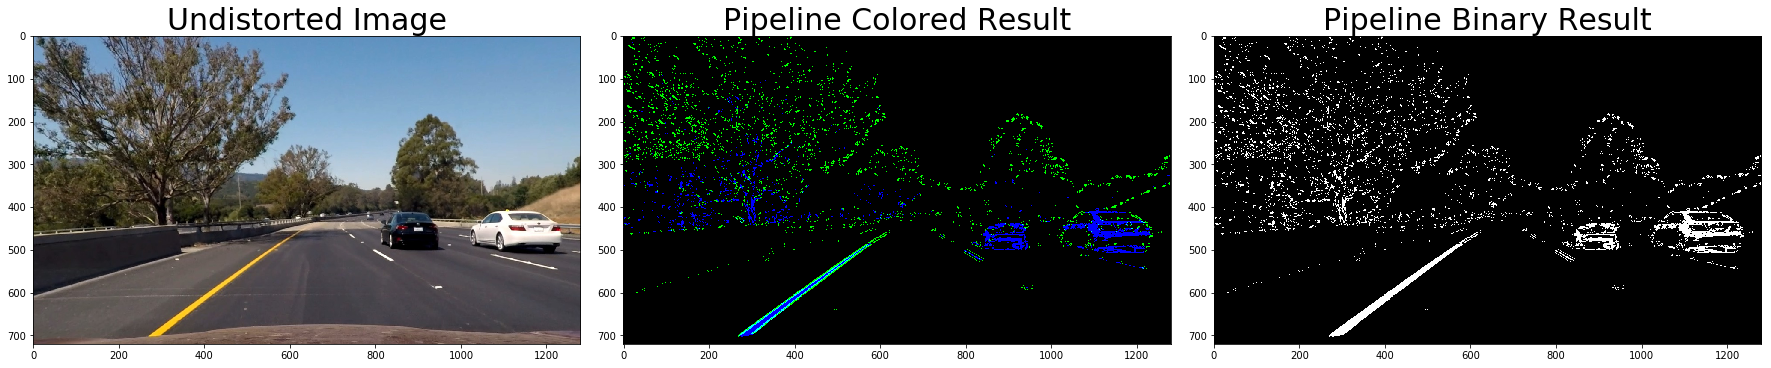

In [4]:
combined, colored = pipeline(und_img_test_ex)

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(und_img_test_ex)
ax1.set_title('Undistorted Image', fontsize=30)

ax2.imshow(colored)
ax2.set_title('Pipeline Colored Result', fontsize=30)

ax3.imshow(combined, cmap='gray')
ax3.set_title('Pipeline Binary Result', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


True

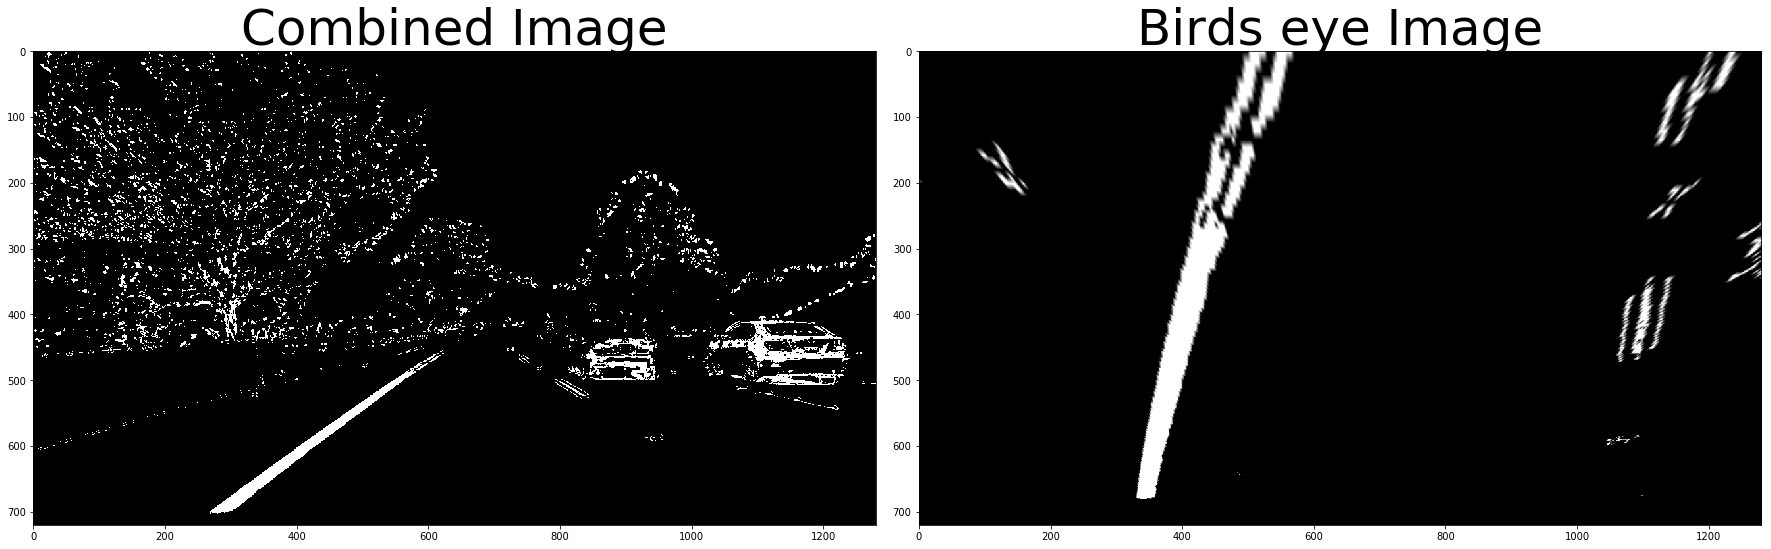

In [5]:
top_down = corners_unwarp(combined, 9, 6, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(combined, cmap='gray')
ax1.set_title('Combined Image', fontsize=50)
ax2.imshow(top_down, cmap='gray')
ax2.set_title('Birds eye Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)